In [1]:
%pylab inline
import pandas as pd
from wordcloud import WordCloud, STOPWORDS

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('data_sets/movies/movies_metadata.csv')

/home/victorcmoura/.virtualenvs/data_manipulation/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
title = df[ df['title'] != df['original_title'] ]

In [4]:
title = title[['title', 'original_title']]

In [5]:
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['budget'] = df['budget'].replace(0, np.nan)

In [6]:
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')
df['revenue'] = df['revenue'].replace(0, np.nan)

In [7]:
release_date_datetime = pd.to_datetime(df['release_date'], errors='coerce')
df['year'] = release_date_datetime.apply(lambda x : x.year)
df['month'] = release_date_datetime.apply(lambda x : x.month)
df['day'] = release_date_datetime.apply(lambda x : x.day)

In [8]:
df['adult'] = df['adult'] == 'True'
df = df.drop('adult', axis=1)

## Exploratory Data Analysis

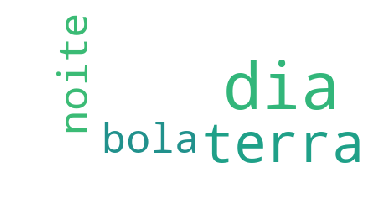

In [9]:
corpus = 'dia noite bola terra terra dia dia'
img = WordCloud(background_color='white').generate(corpus)
plt.axis('off')
plt.imshow(img)

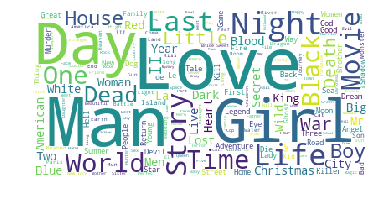

In [10]:
title_corpus = df['title'].astype('str')
title_corpus = ' '.join(title_corpus.values)
img = WordCloud(background_color='white').generate(title_corpus)
plt.axis('off')
plt.imshow(img)

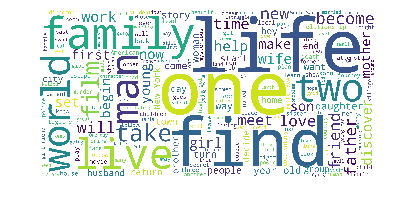

In [11]:
overview_corpus = df['overview'].astype('str')
overview_corpus = ' '.join(overview_corpus.values)
img = WordCloud(background_color='white', height=2000, width=4000).generate(overview_corpus)
plt.axis('off')
plt.imshow(img)

In [12]:
con_df = df['production_countries']

In [13]:
import ast

In [14]:
def protected_literal_eval(x):
    try:
        ans = ast.literal_eval(x)
        
        if type(ans) == list:
            return ans
        else:
            return []
    except:
        return []

In [15]:
con_df = con_df.apply(protected_literal_eval)
con_df = con_df.apply(lambda x: [d['name'] for d in x])

In [16]:
con_df = con_df.apply(lambda x: pd.Series(x)).stack()

In [17]:
con_df = pd.DataFrame(con_df.reset_index(drop=True))
con_df['country'] = con_df[0]

In [18]:
con_df = con_df.groupby('country').count()
con_df = con_df.rename(columns={0: 'numMovies'})

In [19]:
con_df = con_df.reset_index()

In [20]:
con_df = con_df.sort_values(by='numMovies', ascending=False)

In [21]:
con_df

,country,numMovies
153,United States of America,21153
151,United Kingdom,4094
50,France,3940
54,Germany,2254
70,Italy,2169
27,Canada,1765
72,Japan,1648
136,Spain,964
122,Russia,912
64,India,828


In [22]:
import geopandas as gpd

In [23]:
gdf = gpd.read_file('data_sets/countries/ne_10m_admin_0_countries_lakes.shp')

In [24]:
gdf = gdf[['NAME_EN','geometry']]

In [25]:
gdf.head()

,NAME_EN,geometry
0,Indonesia,(POLYGON ((117.7036079039552 4.163414542001791...
1,Malaysia,(POLYGON ((117.7036079039552 4.163414542001791...
2,Chile,(POLYGON ((-69.51008875199994 -17.506588197999...
3,Bolivia,POLYGON ((-69.51008875199994 -17.5065881979999...
4,Peru,(POLYGON ((-69.51008875199994 -17.506588197999...


In [26]:
con_df = con_df.set_index(['country'])
gdf = gdf.set_index(['NAME_EN'])

In [27]:
gmap = gdf.join(con_df, how='inner')

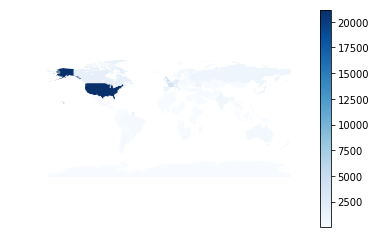

In [34]:
ax = gmap.plot(column='numMovies', cmap='Blues', legend=True)
ax.set_axis_off()

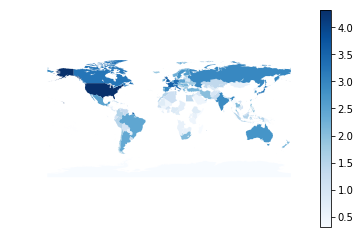

In [41]:
gmap['log_num_movies'] = gmap['numMovies'].apply(lambda x: np.log10(x+1))

ax = gmap.plot(column='log_num_movies', cmap='Blues', legend=True)
ax.set_axis_off()